# Analisando Notas do Filmes

In [ ]:
import pandas as pd

In [ ]:
df_notas = pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
df_notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

**value_counts()** sobre quanto cada nota foi inserida.

In [ ]:
df_notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [ ]:
df_notas['nota'].describe()
print(df_notas['nota'].mean())
print(df_notas['nota'].median())

3.501556983616962
3.5


<Axes: ylabel='nota'>

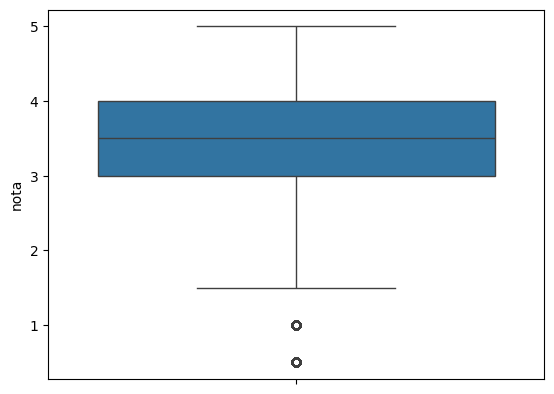

In [ ]:
import seaborn as sns

sns.boxplot(df_notas['nota'])

# Olhando os Filmes

In [ ]:
df_filmes = pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')
df_filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_filmes.columns = ['filmeId', 'titulo', 'generos']
df_filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando Médias por Filme

In [ ]:
media_por_filme = df_notas.groupby('filmeId').mean()['nota']
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

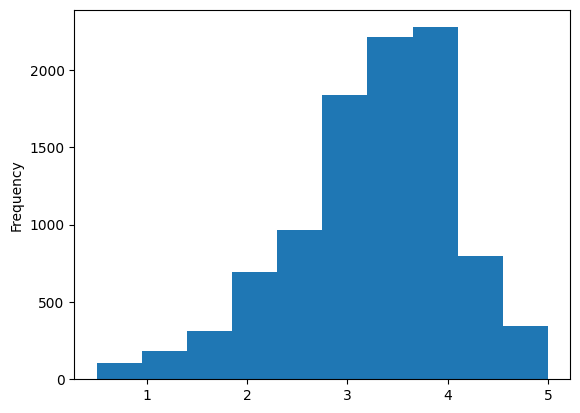

In [ ]:
media_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

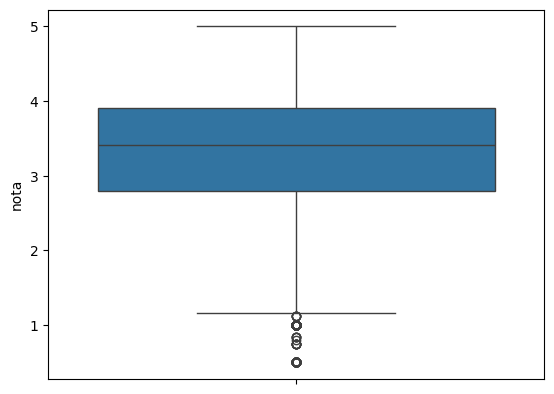

In [ ]:
sns.boxplot(media_por_filme)

<Axes: xlabel='nota', ylabel='Density'>

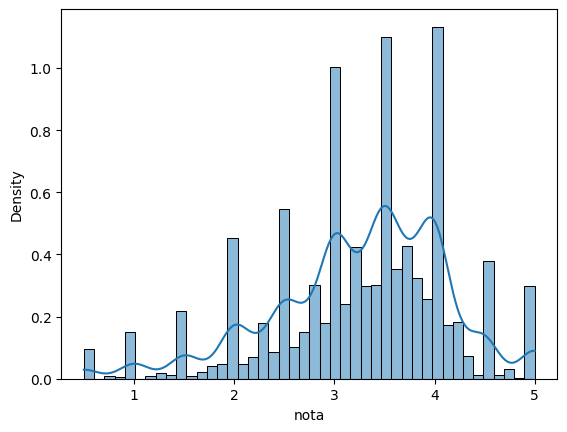

In [ ]:
sns.histplot(media_por_filme , kde=True, stat="density")

Text(0.5, 1.0, 'Histograma de Média dos Filmes')

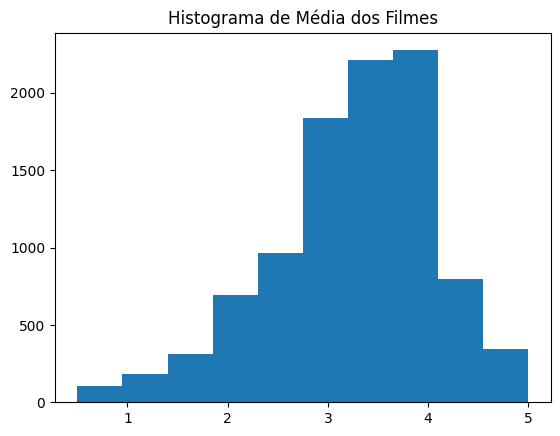

In [ ]:
import matplotlib.pyplot as plt

plt.hist(media_por_filme)
plt.title("Histograma de Média dos Filmes")

In [ ]:
tmdb = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')


In [ ]:
contagem_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_lingua.columns = ['original_language', 'total']
contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


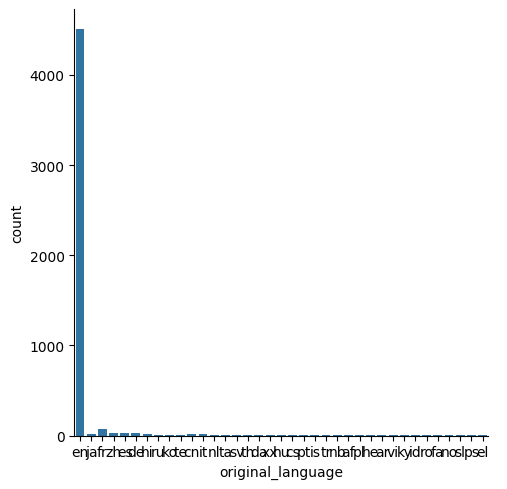

In [ ]:
sns.catplot(x='original_language', kind='count', data=tmdb)

<Axes: xlabel='ligua', ylabel='total'>

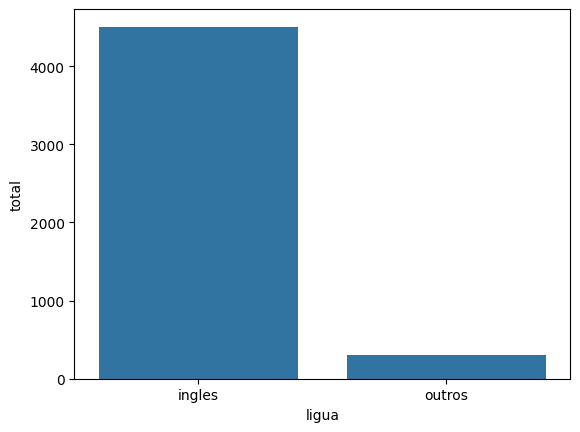

In [ ]:
total_lingua = tmdb['original_language'].value_counts()
total_geral = total_lingua.sum()
total_ingles = total_lingua.loc['en']
total_resto = total_geral - total_ingles
dados ={
    'ligua': ['ingles', 'outros'],
    'total':[total_ingles, total_resto]
}

dados = pd.DataFrame(dados)
sns.barplot(x='ligua', y='total', data=dados)

<ipython-input-20-52bce5f8cdf3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='original_language',


<Figure size 500x1000 with 0 Axes>

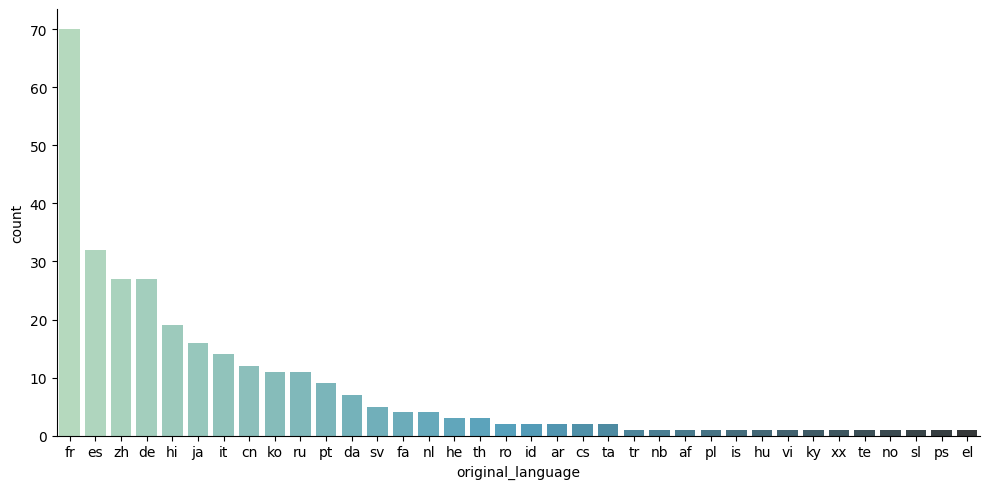

In [ ]:
filtro_diferente_ingles = tmdb['original_language'] != 'en'
dados_sem_ingles = tmdb[filtro_diferente_ingles]
contagem_dados_sem_ingles = dados_sem_ingles['original_language'].value_counts()
plt.figure(figsize=(5,10))

sns.catplot(x='original_language',
            kind='count',
            data= dados_sem_ingles,
            aspect=2,
            palette='GnBu_d',
            order=contagem_dados_sem_ingles.index)


In [ ]:
df_filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas_do_toy_story = df_notas.query("filmeId==1")
notas_do_jumanji = df_notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))


215 110


In [ ]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())


Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
0.8348591407114047 0.8817134921476455


In [ ]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())


Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [ ]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))


3.0 3.0
0.5 2.0
3.0 3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7c056e4e2650>,
 'caps': [<matplotlib.lines.Line2D at 0x7c056e4e2b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c056e4e22f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c056e4e30d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c056e4e3370>,
 'means': []}

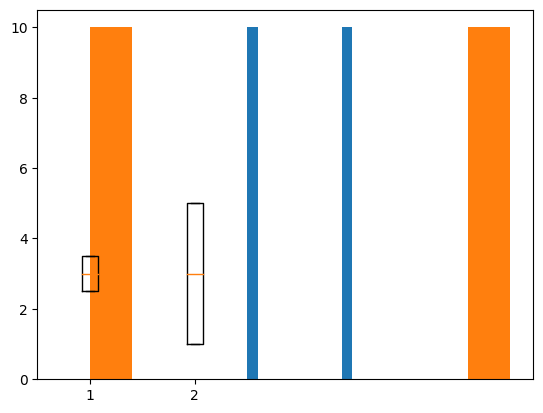

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

plt.boxplot([filme1, filme2])


{'whiskers': [<matplotlib.lines.Line2D at 0x7c056e599150>,
 'caps': [<matplotlib.lines.Line2D at 0x7c056e599690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c056e598eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c056e599bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c056e599e70>,
 'means': []}

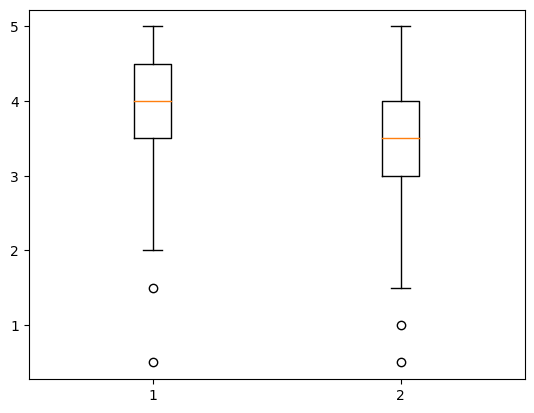

In [ ]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])
